In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_new1 = pd.read_csv('Average_retail_price_of_electricity_monthly_py.csv', parse_dates = True, encoding = "utf_8_sig")

df_new1.Month = pd.to_datetime(df_new1.Month)
df_new1.Month.head()

0   2001-02-01
1   2001-03-01
2   2001-04-01
3   2001-05-01
4   2001-06-01
Name: Month, dtype: datetime64[ns]

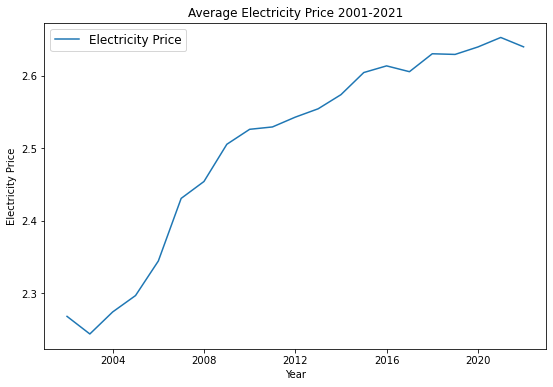

In [9]:
# df_new1
df2 = df_new1.resample('Y', label='right', closed = 'right', on='Month').mean()#sum()
# df2.plot()

df_t = df2.loc['2001-01-01':,]
df_w = pd.DataFrame(columns = ['Electricity_Price'])
df_w.Electricity_Price = np.log(df_t.Electricity_Price + 1)
df_w.head()
plt.figure(figsize=(9,6))
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Average Electricity Price 2001-2021')
plt.plot(df_w, label='Electricity Price')
plt.legend(fontsize = 12)
plt.show()


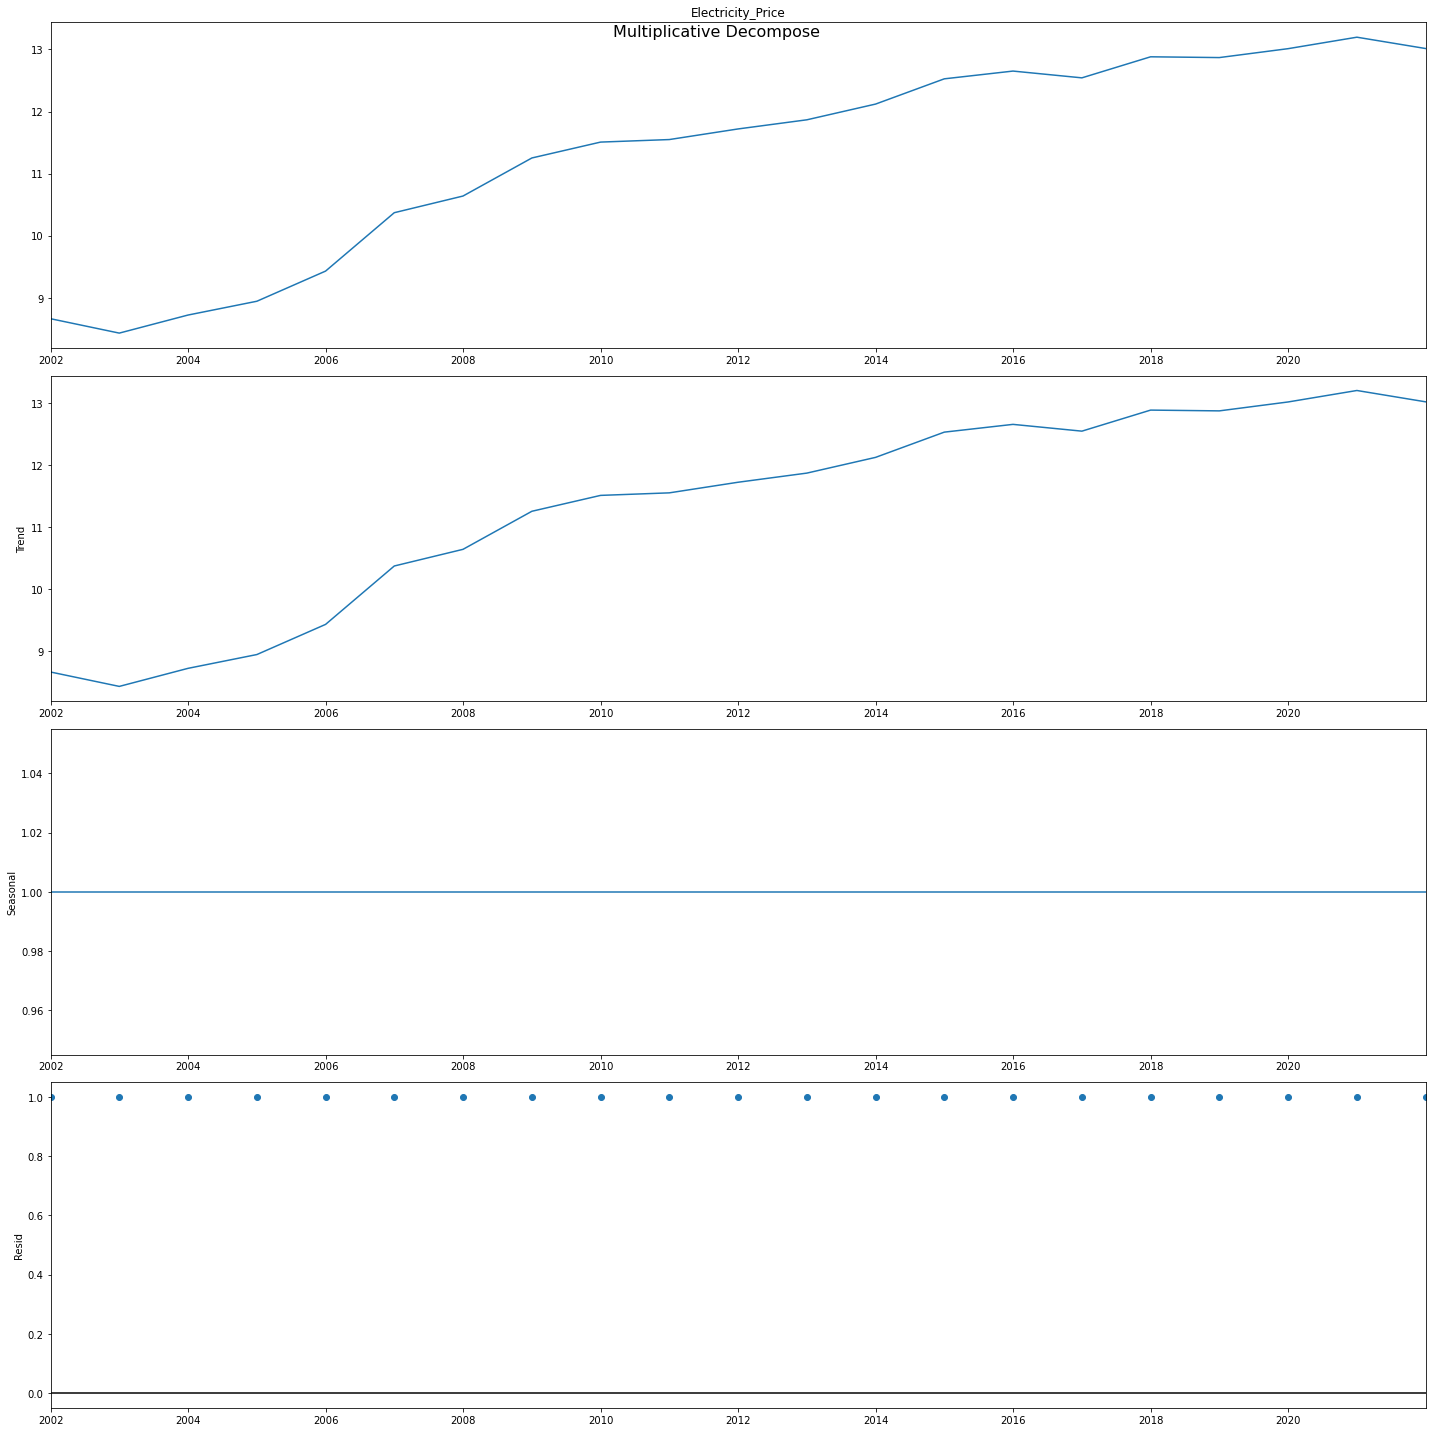

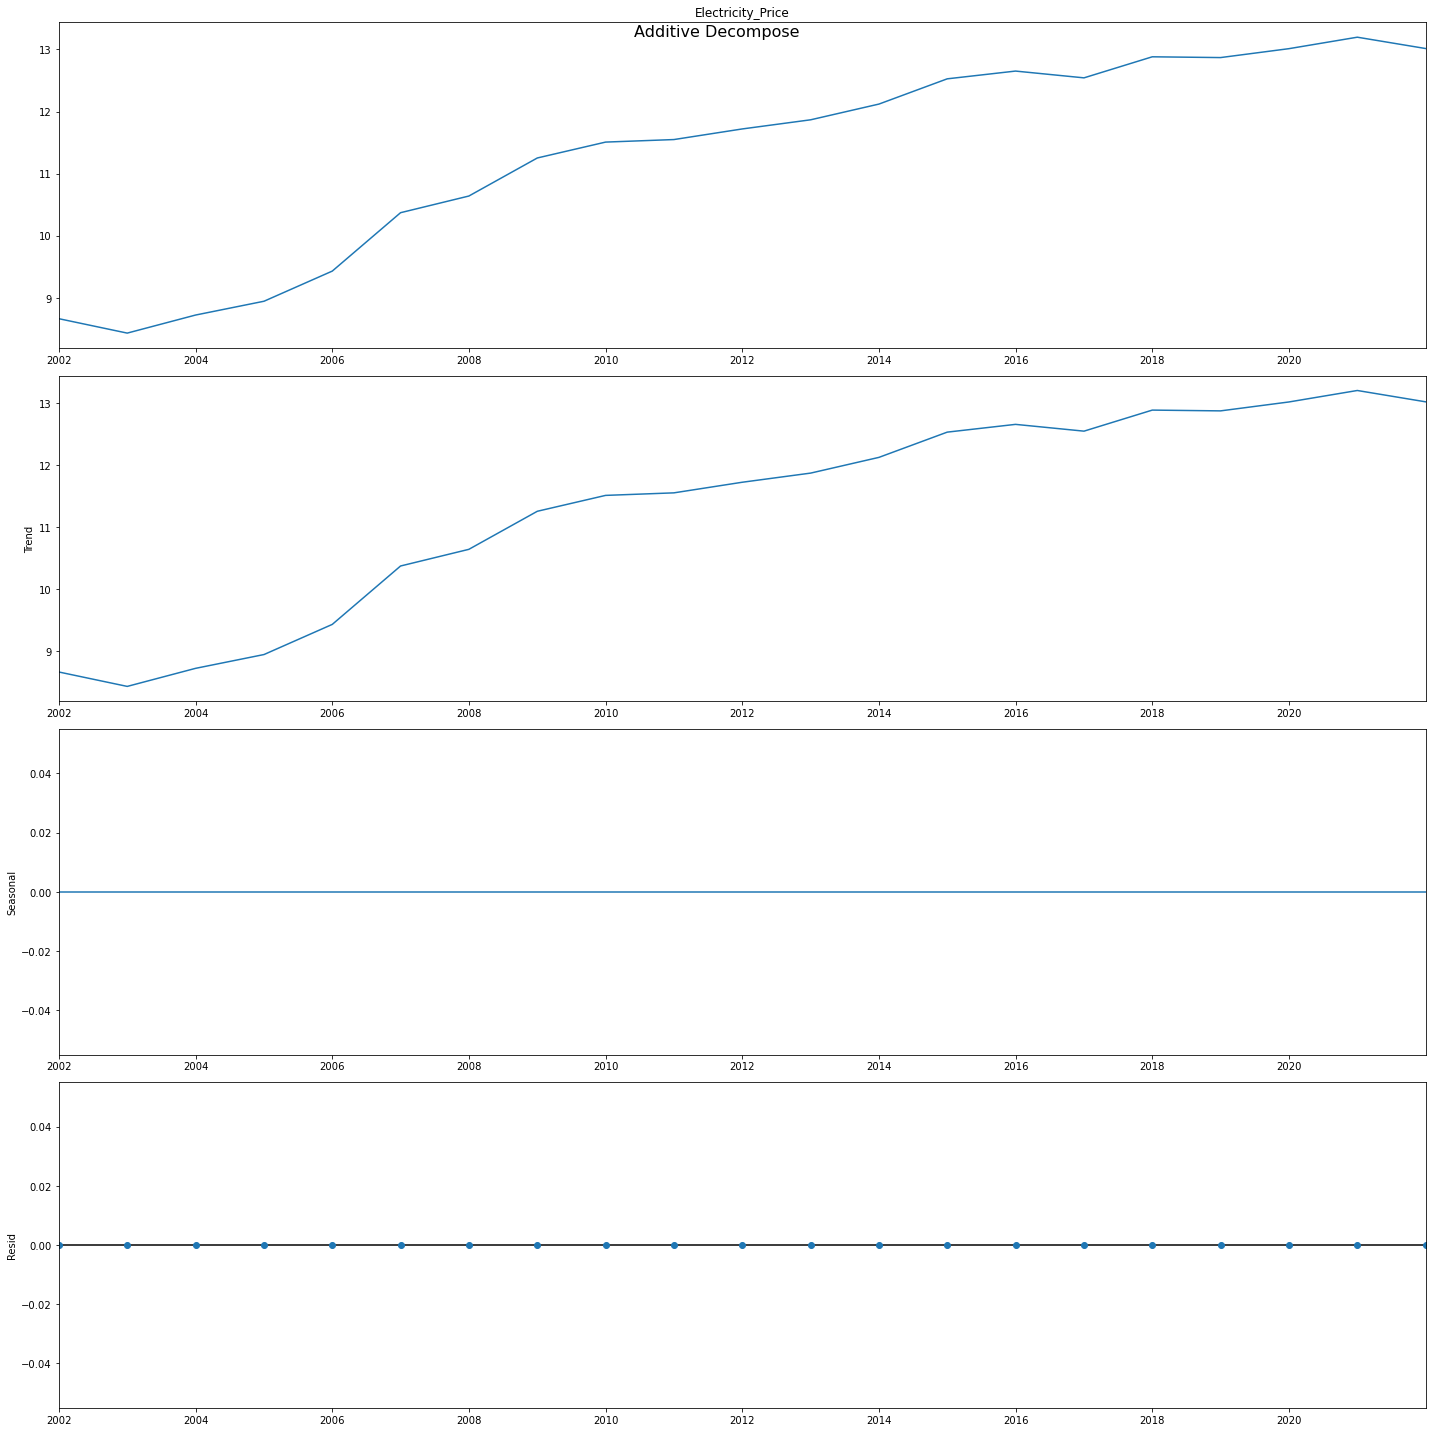

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition
result_mul = seasonal_decompose(df2['Electricity_Price'], model= 'multiplicative', extrapolate_trend= 'freq')
#Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the 
#beginning of the series.
# Additive Decomposition
result_add = seasonal_decompose(df2['Electricity_Price'], model= 'additive', extrapolate_trend='freq')
# Plot
plt.rcParams.update({'figure.figsize': (20,20)}) 
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16) 
result_add.plot().suptitle('Additive Decompose', fontsize=16) 
plt.show()

In [4]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

from sklearn.metrics import mean_squared_error

series = df2['Electricity_Price']

historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

historic = historic.to_list()

predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 1, old_names=False)
    sel.ar_lags
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
#     print(pred)
    predictions.append(pred[0])
    historic.append(test[i])
cross_val = pd.Series(predictions, index=test.index)
print(cross_val)

test_score = mean_squared_error(test, cross_val, squared = False)
#squared: bool, default=True
#If True returns MSE value, if False returns RMSE value.
print(test_score)

Month
2015-12-31    12.795842
2016-12-31    12.886892
2017-12-31    12.717435
2018-12-31    13.068639
2019-12-31    13.025274
2020-12-31    13.160046
2021-12-31    13.341343
Freq: A-DEC, dtype: float64
0.21186891267560035


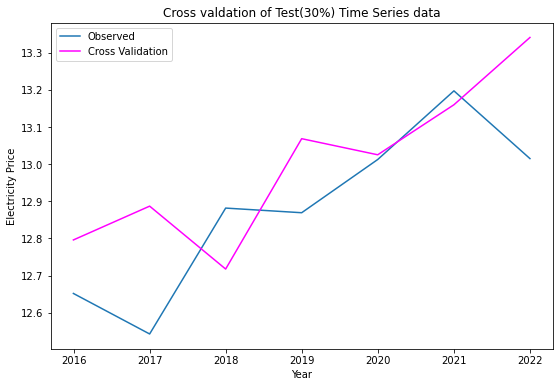

In [5]:
# plot results
plt.figure(figsize=(9,6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Cross valdation of Test(30%) Time Series data')
plt.show()

In [10]:
historic = series
#prediction for the next 5 years
# n_pred = 60
#prediction for the next 5 years
n_pred = 10

#the future weeks starts on 2021-01-01, because the last existing data ends on 2021-01-01
date_pred = pd.date_range("2021-01-01", periods=n_pred, freq="y")

sel = ar_select_order(historic, 5, glob = True, seasonal = False, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
print(pred)

2022-12-31    13.224099
2023-12-31    13.208796
2024-12-31    13.245770
2025-12-31    13.408405
2026-12-31    13.336068
2027-12-31    13.440447
2028-12-31    13.448117
2029-12-31    13.431373
2030-12-31    13.521949
2031-12-31    13.488163
Freq: A-DEC, dtype: float64


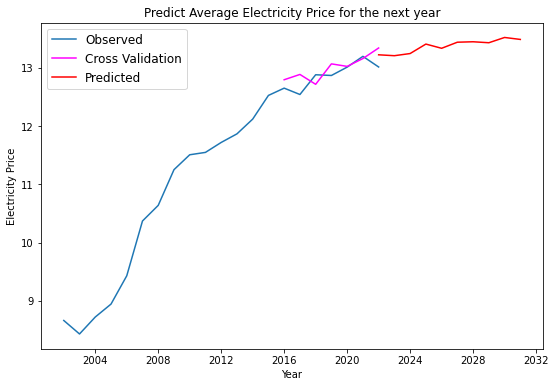

In [11]:
predictions = pd.Series(pred.values, index=date_pred)

# plot results
plt.figure(figsize=(9,6))
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Predict Average Electricity Price for the next year')
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 12)
plt.show()